## Importing necessary liabraries and model techniques

In [265]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score, plot_confusion_matrix

## Loading the Dataset

In [266]:
df1 = pd.read_csv("UCI_Credit_Card.csv")
df1.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [267]:
df1.shape

(30000, 25)

In [268]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [269]:
df1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [270]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [271]:
df1.duplicated().any()

False

In [272]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [273]:
# Renaming the target column for better reference. and changing PAY_0 to PAY_1.
df1.rename(columns={"default.payment.next.month" : "default", "PAY_0":"PAY_1"}, inplace=True)
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [274]:
# Count in diff categorical columns
for columns in ["SEX","EDUCATION","MARRIAGE"]:
    print(df1[columns].value_counts())
    print("", end="\n")
    

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



In [275]:
df1.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

#### Default : 1 - Yes, 0 - No

In [276]:
df1["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

#### Gender : 1 - Male , 2 - Female

In [277]:
df1.groupby("default")["SEX"].value_counts(ascending=True)

default  SEX
0        1       9015
         2      14349
1        1       2873
         2       3763
Name: SEX, dtype: int64

#### Females are defaulting more than the Males

In [278]:
plt.rcParams["figure.figsize"]=(10,6)

In [279]:
def plot_vis(col):
    sns.countplot(x = col, hue=df1.default)

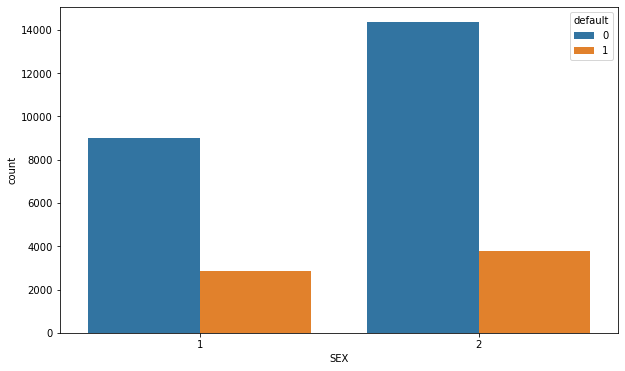

In [280]:
plot_vis(df1.SEX)

In [281]:
df1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

#### Education has 7 categories where 1,2,3 are having most of the data points and remaining 0,5,6 can be merged into value 4.

In [282]:
df1.loc[(df1["EDUCATION"]==5)| (df1["EDUCATION"]==6) |(df1["EDUCATION"]==0),"EDUCATION"] = 4
df1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

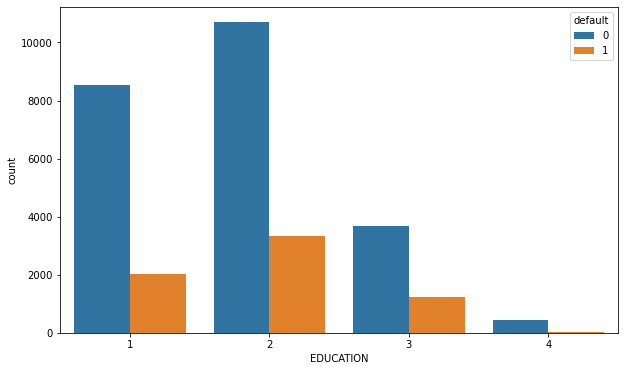

In [284]:
plot_vis(df1.EDUCATION)

#### 1 = Graduate School, 2 = University, 3 = High School, 4 = Others

#### People having university level education are defaulting more than others. But peope with High School level education have higher ratio of default against availment. 

In [285]:
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [286]:
df1.loc[df1.MARRIAGE==0, "MARRIAGE"] = 3
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

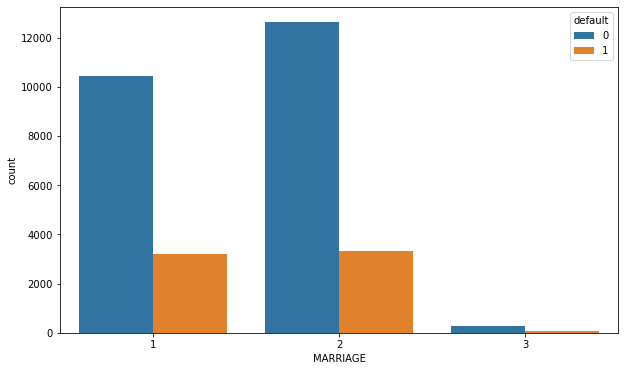

In [287]:
plot_vis(df1.MARRIAGE)

#### 1 = Married, 2 = Single, 3 = Others

In [288]:
for columns in df1.columns:
    print(columns," : ", df1[columns].nunique())

ID  :  30000
LIMIT_BAL  :  81
SEX  :  2
EDUCATION  :  4
MARRIAGE  :  3
AGE  :  56
PAY_1  :  11
PAY_2  :  11
PAY_3  :  11
PAY_4  :  11
PAY_5  :  10
PAY_6  :  10
BILL_AMT1  :  22723
BILL_AMT2  :  22346
BILL_AMT3  :  22026
BILL_AMT4  :  21548
BILL_AMT5  :  21010
BILL_AMT6  :  20604
PAY_AMT1  :  7943
PAY_AMT2  :  7899
PAY_AMT3  :  7518
PAY_AMT4  :  6937
PAY_AMT5  :  6897
PAY_AMT6  :  6939
default  :  2


#### Here "SEX", "EDUCATION", "MARRIAGE","PAY_1 TO PAY_6" are Categorical Columns and rest are Numerical columns.

In [289]:
cat_columns = []
num_columns = []

for columns in df1.columns:
    if df1[columns].nunique()<12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)
    
print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)
        

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']
Numerical Columns Are :  ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [290]:
num_columns.remove("ID")
cat_columns.remove("default")

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## EDA For Numerical Columns

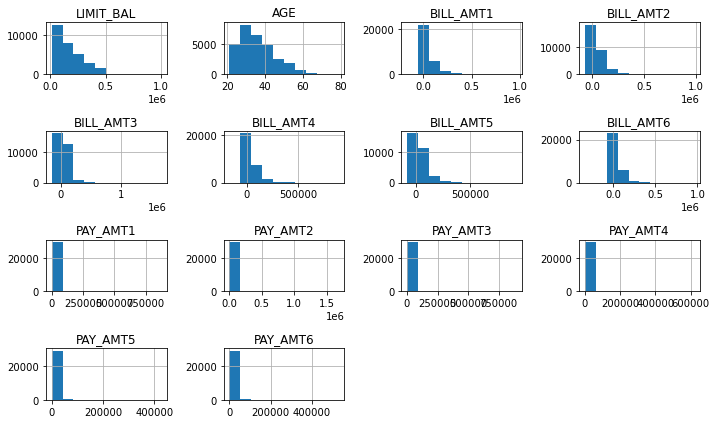

In [291]:
df1[num_columns].hist()
plt.tight_layout()
plt.show()

#### The numerical columns need to be converted into the Gaussian Distribution.

In [292]:
def sub_plots_num(col):
    plt.subplot(1,2,1)
    sns.histplot(x=col, hue = df1["default"])
    
    plt.subplot(1,2,2)
    sns.boxplot(y=col, x=df1["default"])

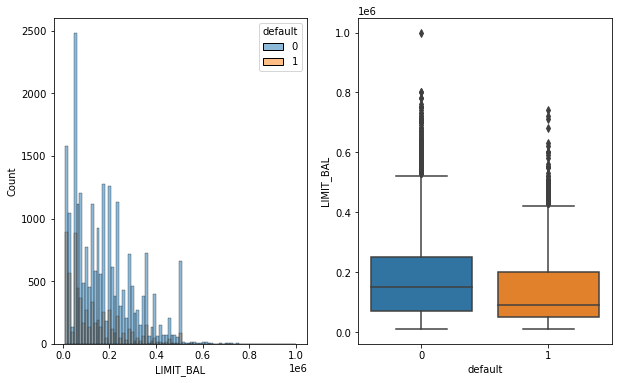

In [293]:
sub_plots_num(df1["LIMIT_BAL"])

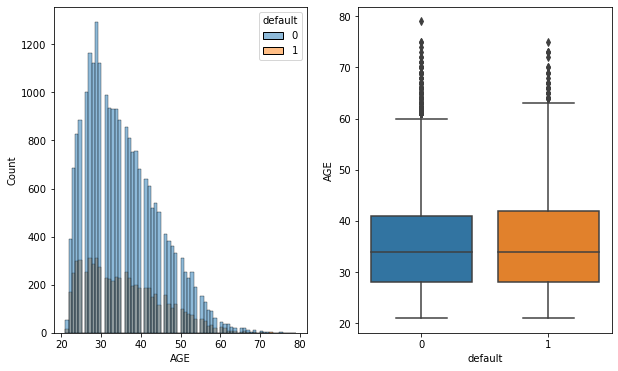

In [295]:
sub_plots_num(df1["AGE"])

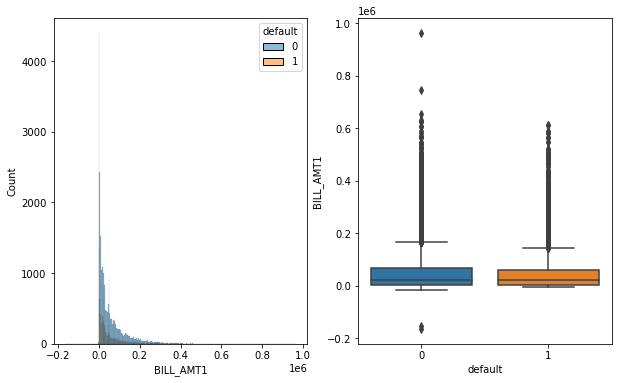

In [296]:
sub_plots_num(df1["BILL_AMT1"])

#### Bill Amount for the remaining months follow the same Pattern.

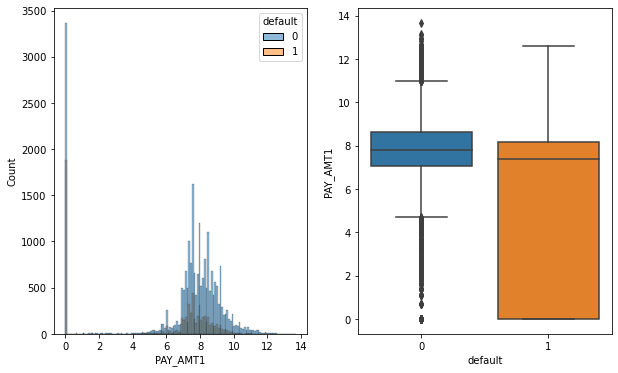

In [297]:
sub_plots_num(np.log1p(df1["PAY_AMT1"]))

#### Amount Pay follows similar patter like the "PAY_AMT1"

### Numerical Features are not having Gaussian Distribution. It is good to transform these into Gaussian Distribution.

## EDA For Categorical Columns

In [298]:
cat_columns

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [299]:
def plot_cat_columns(col):
    pie_val = df1.groupby(col)["default"].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col, data=df1)
    
    plt.subplot(1,2,2)
    plt.pie(pie_val, autopct= "%0.1f%%", labels = pie_val.index)

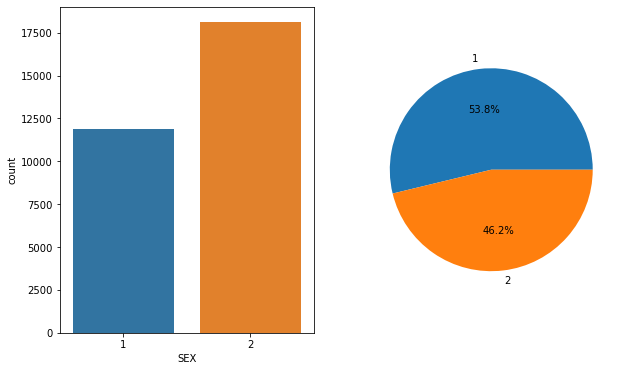

In [300]:
plot_cat_columns("SEX")

#### Female have higher chances of default than Male.

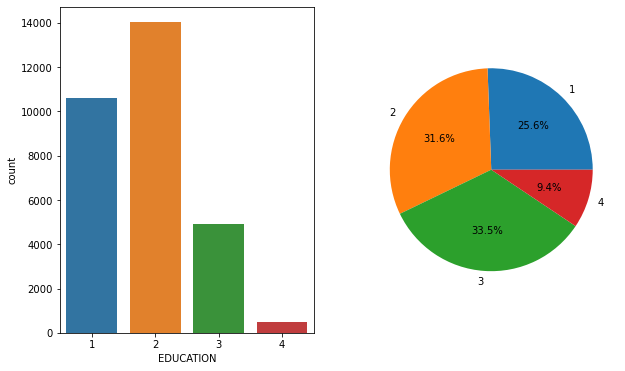

In [301]:
plot_cat_columns("EDUCATION")

#### Although the number of defaulters are higher in people having University level education but the people having High School education have higher chances of deafult.

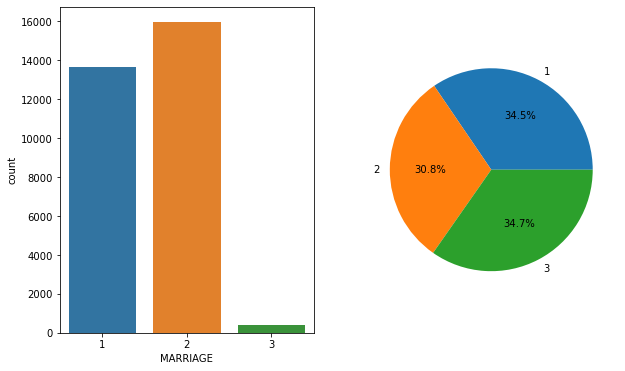

In [302]:
plot_cat_columns("MARRIAGE")

In [303]:
for i in range(1,7):
    col = "PAY_"+str(i)
    #print(col)
    df1.loc[(df1[col]==-2) | (df1[col] ==-1), col] =0

#### Single people have less chances of default than Married and others.

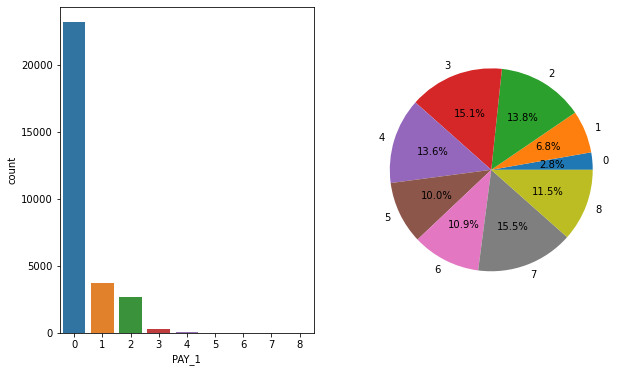

In [304]:
plot_cat_columns("PAY_1")

#### As the repayment gets delayed by 1 month, the chances of default increase.

#### Differentiating Independent and dependent features

In [305]:
X = df1.drop(["ID", "default"], axis=1)
y = df1["default"]

## Creating Functions For Model Training And Evaluation

In [306]:
#### Identifying the defaulter is main task and therefore positive class is more important then negative class
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [307]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "SVM" : SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
}

<IPython.core.display.Javascript object>

In [350]:
def evaluate_models(X, y, models):
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # As we have seen through visualization, we need to transform the numerical columns as those are not having Gaussian Distribution.
    transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
    transformer.fit(X_train)

    columns = num_columns+cat_columns
    X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
    X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        
        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        
        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        
        print('\n')
        
    report=pd.DataFrame(list(models_list), columns=['Model Name'])
        
    return report

In [309]:
report_1= evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 0.9993
- Recall: 0.9999
- Roc Auc Score: 0.9996
----------------------------------
Model performance for Test set
- Accuracy: 0.8321
- F1 score: 0.8293
- Precision: 0.8544
- Recall: 0.8057
- Roc Auc Score: 0.8325


Logistic Regression
Model performance for Training set
- Accuracy: 0.7332
- F1 score: 0.7249
- Precision: 0.7458
- Recall: 0.7052
- Roc Auc Score: 0.7331
----------------------------------
Model performance for Test set
- Accuracy: 0.7343
- F1 score: 0.7271
- Precision: 0.7573
- Recall: 0.6993
- Roc Auc Score: 0.7347


SVM
Model performance for Training set
- Accuracy: 0.7801
- F1 score: 0.7701
- Precision: 0.8042
- Recall: 0.7388
- Roc Auc Score: 0.7800
----------------------------------
Model performance for Test set
- Accuracy: 0.7674
- F1 score: 0.7583
- Precision: 0.8000
- Recall: 0.7208
- Roc Auc Score: 0.7680


Decision Tree
Model performance for Training set
- Accuracy

#### Choosing Random Forest as the Final Model.

In [351]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

RandomForestClassifier()

In [352]:
y_predicted = final_model.predict(X_test)

In [353]:
final_model.score(X_train, y_train)

0.9994779215783255

In [354]:
accuracy_score(y_test, y_predicted)

0.8463567424991757

In [355]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      4550
           1       0.86      0.83      0.84      4549

    accuracy                           0.85      9099
   macro avg       0.85      0.85      0.85      9099
weighted avg       0.85      0.85      0.85      9099



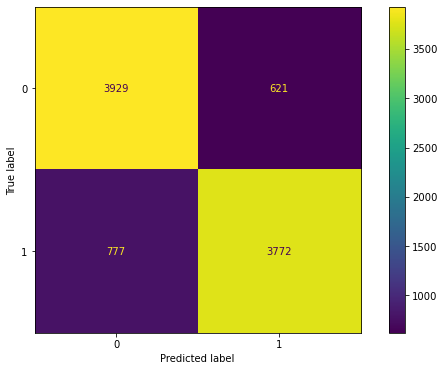

In [356]:
plot_confusion_matrix(final_model, X_test, y_test);